В этой части проекта вам нужно написать несколько SQL-запросов в Jupyter Notebook. Эти задания проверят вручную, и вы получите комментарии к составленным запросам. 

Необходимые данные находятся в таблицах схемы `stackoverflow`. Не забудьте подключиться к базе с помощью SQLAlchemy. 

Чтобы ожидаемый результат было легче представить, мы добавили к каждому заданию небольшой фрагмент итоговой таблицы. В запросах вы можете использовать любые подходящие названия полей.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine 

### Конфигурация для подключения к базе данных `data-analyst-advanced-sql`
Эта база данных содержит схему `stackoverflow`, с которой вы будете работать в проекте

In [2]:
db_config = {
    'user': 'praktikum_student', # имя пользователя
    'pwd': 'Sdf4$2;d-d30pp', # пароль
    'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
    'port': 6432, # порт подключения
    'db': 'data-analyst-advanced-sql' # название базы данных
}  

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
)

Создание подключения

In [3]:
engine = create_engine(connection_string) 

In [4]:
query = '''
SELECT *
FROM stackoverflow.users
LIMIT 10;
'''

sample_df = pd.read_sql_query(query, con=engine) 

In [5]:
sample_df

,id,creation_date,display_name,last_access_date,location,reputation,views
0,1,2008-07-31 14:22:31,Jeff Atwood,2018-08-29 02:34:23,"El Cerrito, CA",44300,408587
1,2,2008-07-31 14:22:31,Geoff Dalgas,2018-08-23 17:31:56,"Corvallis, OR",3491,23966
2,3,2008-07-31 14:22:31,Jarrod Dixon,2018-08-30 20:56:24,"Raleigh, NC, United States",13418,24396
3,4,2008-07-31 14:22:31,Joel Spolsky,2018-08-14 22:18:15,"New York, NY",28768,73755
4,5,2008-07-31 14:22:31,Jon Galloway,2018-08-29 16:48:36,"San Diego, CA",39172,11700
5,8,2008-07-31 21:33:24,Eggs McLaren,2018-04-09 02:04:56,None,942,6372
6,9,2008-07-31 21:35:27,Kevin Dente,2018-08-30 18:18:03,"Oakland, CA",14337,4949
7,11,2008-08-01 00:59:11,Anonymous User,2008-08-01 00:59:11,None,1890,2123
8,13,2008-08-01 04:18:05,Chris Jester-Young,2018-08-30 02:47:23,"Raleigh, NC, United States",177138,35414
9,17,2008-08-01 12:02:22,Nick Berardi,2018-01-22 01:35:38,"Issaquah, WA",44443,4786


<div class="alert alert-block alert-success">
    
    
### Комментарий от ревьюера v_1
Отлично
    
К базе подключились, приступаем к запросам
</div>

# Задание 1

Выведите общую сумму просмотров постов за каждый месяц 2008 года. Если данных за какой-либо месяц в базе нет, такой месяц можно пропустить. Результат отсортируйте по убыванию общего количества просмотров.

| month_date  | total_views |
| ------------- | ------------- |
| 2008-09-01  | 452928568  |
| 2008-10-01  | 365400138  |
| ...         | ... |

In [6]:
# напишите запрос
query = '''
select date_trunc('month', creation_date) :: date as month_date,
sum(views_count) as total_views
from stackoverflow.posts
group by 1
order by 2 desc
'''

# выполните запрос
task1 = pd.read_sql_query(query, con=engine) 
task1


,month_date,total_views
0,2008-09-01,452928568
1,2008-10-01,365400138
2,2008-11-01,221759651
3,2008-12-01,197792841
4,2008-08-01,131367083
5,2008-07-01,669895


Проанализируйте итоговую таблицу. Отличаются ли данные за разные месяцы? С чем могут быть связаны отличия?

In [7]:
#Данные отличаются  от месяца к месяцу. Отличия могут быть связаны с количеством посетителей в определенный месяц,
#количеством постов.

# напишите ваш ответ здесь

# Задание 2

Выведите имена самых активных пользователей, которые в первый месяц после регистрации (включая день регистрации) дали больше 100 ответов. Вопросы, которые задавали пользователи, не учитывайте. Для каждого имени пользователя выведите количество уникальных значений `user_id`. Отсортируйте результат по полю с именами в лексикографическом порядке.

| display_name | count |
| ------------ | ----- |
| 1800 INFORMATION | 1 |
| Adam Bellaire | 1 |
| Adam Davis | 1 |
| ... | ... |

In [8]:
# напишите запрос
query = '''
with t1 as (select u.display_name,
p.user_id as user_id,
u.creation_date,
u.creation_date + interval '1' month as period,
p.creation_date as date_post,
pt.type
from stackoverflow.users u
left join stackoverflow.posts p on u.id=p.user_id
left join stackoverflow.post_types pt on p.post_type_id=pt.id
where pt.type='Answer'),

t2 as (select display_name,
user_id,
count (date_post)
from t1
where date_post between creation_date and creation_date + interval '1' month
group by 1,2 )

select display_name,
count (distinct user_id)
from t2
where count>100
group by 1
order by 1
'''

# выполните запрос
task2 = pd.read_sql_query(query, con=engine) 
task2

,display_name,count
0,1800 INFORMATION,1
1,Adam Bellaire,1
2,Adam Davis,1
3,Adam Liss,1
4,Amy B,1
...,...,...
57,leppie,1
58,lomaxx,1
59,mattlant,1
60,paxdiablo,1


Какие аномалии наблюдаются в данных? О чём они говорят?

In [9]:
# Аномалий не нашла. есть рользователь 1800 INFORMATION, скорее всего это авто пост и раз он попал в выборку,
#значит авто постов в месяц происходит больше 100 это странно.
# напишите ваш ответ здесь

# Задание 3

Выведите количество постов за 2008 год по месяцам. Отберите посты от пользователей, которые зарегистрировались в сентябре 2008 года и сделали хотя бы один пост в декабре того же года. Отсортируйте таблицу по значению месяца по убыванию.

| month | count |
| ------|------ |
| 2008-12-01 | 17641 |
| 2008-11-01 | 18294 |
| ... | ... |

In [10]:
# напишите запрос
query = '''
with post12 as 
(select user_id
from stackoverflow.posts
where date_trunc('month', creation_date):: date='2008-12-01'),

reg9 as
(select u.id
from stackoverflow.users u
where date_trunc('month', u.creation_date):: date='2008-09-01')

select date_trunc('month', p.creation_date):: date as month,
count (distinct p.id)
from stackoverflow.posts p
inner join reg9 on p.user_id=reg9.id
inner join post12 on p.user_id=post12.user_id
group by 1
order by 1 desc
'''

# выполните запрос

task3 = pd.read_sql_query(query, con=engine) 
task3

,month,count
0,2008-12-01,17641
1,2008-11-01,18294
2,2008-10-01,27171
3,2008-09-01,24870
4,2008-08-01,32


Изучите данные: есть ли в них аномалии? Предположите, почему могли появиться аномальные значения.

In [11]:
#Аномально выглядит количество постов в августе, при условии отбора постов от пользователей зарегистрированных в сентябре. 
#Может быть можно создать пост прошлой датой или ответить на прошлый посты, а дата поста не изменится.
# напишите ваш ответ здесь

<div class="alert alert-block alert-success">

    
### Комментарий от ревьюера v_1

Да, непорядок какой-то получается 😃

</div>

# Задание 4

Используя данные о постах, выведите несколько полей:

- идентификатор пользователя, который написал пост;
- дата создания поста;
- количество просмотров у текущего поста;
- сумму просмотров постов автора с накоплением.

Данные в таблице должны быть отсортированы по возрастанию идентификаторов пользователей, а данные об одном и том же пользователе — по возрастанию даты создания поста.

| user_id | creation_date | views_count | cumulative_count |
| ------ | -------------- | ----------- | ---------------- |
| 1 | 2008-07-31 23:41:00  | 480476   | 480476  |
| 1 | 2008-07-31 23:55:38  | 136033 | 616509  | 
| 1 | 2008-07-31 23:56:41  | 0 |  616509  |
| ... | ... | ... | ... |
| 2 | 2008-07-31 23:56:41 | 79087  | 79087 |
| 2 | 2008-08-01 05:09:56 | 65443 | 144530 |
| ... | ...  | ...  | ...  |

In [12]:
# напишите запрос
query = '''
select user_id,
creation_date,
views_count,
sum(views_count) over (partition by user_id order by creation_date)
from stackoverflow.posts
order by 1
'''

# выполните запрос
task4 = pd.read_sql_query(query, con=engine) 
task4

,user_id,creation_date,views_count,sum
0,1,2008-07-31 23:41:00,480476,480476
1,1,2008-07-31 23:55:38,136033,616509
2,1,2008-07-31 23:56:41,0,616509
3,1,2008-08-04 02:45:08,0,616509
4,1,2008-08-04 04:31:03,0,616509
...,...,...,...,...
243791,5696608,2008-12-23 16:00:37,0,2804
243792,5696608,2008-12-23 17:35:09,0,2804
243793,5696608,2008-12-24 01:02:48,0,2804
243794,5696608,2008-12-30 14:34:45,0,2804


# Задание 5

Найдите среднее количество постов пользователей в день за август 2008 года. Отберите данные о пользователях, которые опубликовали больше 120 постов за август. Дни без публикаций не учитывайте. 

Отсортируйте результат по возрастанию среднего количества постов. Значения можно не округлять.

| user_id | avg_daily |
| ------- | --------- |
| 116     | 4.777778  |
| 234     | 5.208333  |
| ...     | ... |

In [13]:
# напишите запрос
query = '''

with user120 as (select user_id,
count (distinct id) as qty
from stackoverflow.posts p
where date_trunc('month', creation_date) :: date = '2008-08-01'
group by 1
having count (distinct id)>120),

post8 as (select p.user_id,
date_trunc('day', p.creation_date) :: date,
count (distinct p.id)
from stackoverflow.posts p
inner join user120 u120 on p.user_id=u120.user_id
where date_trunc('month', p.creation_date) :: date = '2008-08-01'
group by 1, 2)

select user_id,
avg (count)
from post8
group by 1
order by 2

'''

# выполните запрос
task5 = pd.read_sql_query(query, con=engine) 
task5

,user_id,avg
0,116,4.777778
1,234,5.208333
2,91,5.681818
3,905,7.000000
4,383,7.277778


# Задание 6

Сколько в среднем дней в период с 1 по 7 декабря 2008 года пользователи взаимодействовали с платформой? Для каждого пользователя отберите дни, в которые он или она опубликовали хотя бы один пост. Нужно получить одно целое число — не забудьте округлить результат. 

| result |
| -----  |
| <целое число> |

In [14]:
# напишите запрос
query = '''
with t1 as (select user_id,
count (distinct (date_trunc('day', creation_date) :: date)) as qty_post
from stackoverflow.posts p
where date_trunc('day', creation_date) :: date between '2008-12-01' and '2008-12-07'
group by 1)

select
round (avg (qty_post), 0) as result
from t1
'''

# выполните запрос
task6 = pd.read_sql_query(query, con=engine) 
task6

,result
0,2.0


Проанализируйте итоговую таблицу — какие выводы можно сделать?

In [15]:
# пользователи в среднем на 1й неделе декабря 2008 года публиковали посты 2 дня из 7.
# напишите ваш ответ здесь

# Задание 7

Выведите историю активности каждого пользователя в таком виде: идентификатор пользователя, дата публикации поста. Отсортируйте вывод по возрастанию идентификаторов пользователей, а для каждого пользователя — по возрастанию даты публикации.

Добавьте в таблицу новое поле: для каждого поста в нём будет указано название месяца предпоследней публикации пользователя относительно текущей. Если такой публикации нет, укажите `NULL`.  Python автоматически поменяет `NULL` на `None`, но дополнительно преобразовывать значения `None` вам не нужно.

Посмотрите внимательно на образец таблицы: для первых двух постов предпоследней публикации нет, но, начиная с третьего поста, в новое поле входит нужный месяц. Для следующего пользователя в первые две записи поля `second_last_month` тоже войдёт `NULL`.

| user_id | creation_date | second_last_month |
| ------- | ------------- | ----------------- |
| 1       | 2008-07-31 23:41:00 | None |
| 1       | 2008-07-31 23:55:38 | None |
| 1       | 2008-07-31 23:56:41 | July |
| 1       | 2008-08-04 02:45:08 | July |
| 1       | 2008-08-04 04:31:03 | July |
| 1       | 2008-08-04 08:04:42 | August |
| ... | ... | ... |

In [16]:
# напишите запрос
query = '''
with t1 as (select user_id,
creation_date,
lag(to_char(creation_date, 'Month')) over (partition by user_id order by creation_date) as pd
from stackoverflow.posts p
order by 1, 2)

select user_id,
creation_date,
lag (pd) over (partition by user_id order by creation_date)
from t1
order by 1, 2

'''

# выполните запрос
task7 = pd.read_sql_query(query, con=engine) 
task7

,user_id,creation_date,lag
0,1,2008-07-31 23:41:00,None
1,1,2008-07-31 23:55:38,None
2,1,2008-07-31 23:56:41,July
3,1,2008-08-04 02:45:08,July
4,1,2008-08-04 04:31:03,July
...,...,...,...
243791,5696608,2008-12-23 16:00:37,December
243792,5696608,2008-12-23 17:35:09,December
243793,5696608,2008-12-24 01:02:48,December
243794,5696608,2008-12-30 14:34:45,December


# Задание 8

Рассчитайте аналог Retention Rate по месяцам для пользователей StackOverflow. Объедините пользователей в когорты по месяцу их первого поста. Возвращение определяйте по наличию поста в текущем месяце. 

| cohort_dt | session_date | users_cnt | cohort_users_cnt | retention_rate |
| --- | --- | --- | --- | --- |
| 2008-07-01 00:00:00 | 2008-07-01 00:00:00 | 3 | 3 | 100 |
| 2008-07-01 00:00:00 | 2008-08-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-07-01 00:00:00 | 2008-09-01 00:00:00 | 1 | 3 | 33,33 |
| 2008-07-01 00:00:00 | 2008-10-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-07-01 00:00:00 | 2008-11-01 00:00:00 | 1 | 3 | 33,33 |
| 2008-07-01 00:00:00 | 2008-12-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-08-01 00:00:00 | 2008-08-01 00:00:00 | 2151 | 2151 | 100 |
| ... | ... | ... | ... | ... |

In [17]:
# напишите запрос
query = '''
with profile as
(select user_id,
date_trunc('month', MIN(creation_date))::date AS cohort_dt
from stackoverflow.posts
group by 1),

sessions as 
(select user_id,
date_trunc('month', creation_date)::date AS session_date
from stackoverflow.posts
group by 1, 2),

qty_user_chort as 
(select cohort_dt,
count (user_id) as cohort_users_qty
from profile
group by 1)

select p.cohort_dt,
s.session_date,
count(p.user_id) AS users_cnt,
quc.cohort_users_qty,
round(count(p.user_id) * 100.0 / quc.cohort_users_qty, 2) AS retention_rate
from profile p
join sessions s ON p.user_id = s.user_id
join qty_user_chort quc on p.cohort_dt=quc.cohort_dt
group by 1,
         2,
         4
   
'''

# выполните запрос
task8 = pd.read_sql_query(query, con=engine) 
task8

,cohort_dt,session_date,users_cnt,cohort_users_qty,retention_rate
0,2008-07-01,2008-07-01,3,3,100.00
1,2008-07-01,2008-08-01,2,3,66.67
2,2008-07-01,2008-09-01,1,3,33.33
3,2008-07-01,2008-10-01,2,3,66.67
4,2008-07-01,2008-11-01,1,3,33.33
5,2008-07-01,2008-12-01,2,3,66.67
6,2008-08-01,2008-08-01,2151,2151,100.00
7,2008-08-01,2008-09-01,1571,2151,73.04
8,2008-08-01,2008-10-01,1275,2151,59.27
9,2008-08-01,2008-11-01,1050,2151,48.81


Постройте тепловую карту Retention Rate. Какие аномалии или другие необычные явления удалось выявить? Сформулируйте гипотезы о возможных причинах.

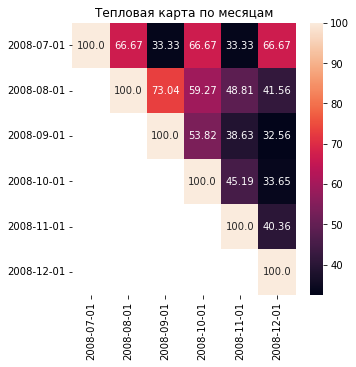

In [18]:
# постройте тепловую карту Retention Rate

import seaborn as sns

retention = task8.pivot('cohort_dt', 'session_date', 'retention_rate')
retention.index = [str(x)[0:10] for x in retention.index]
retention.columns = [str(x)[0:10] for x in retention.columns]

# строим хитмэп
plt.figure(figsize=(5, 5))
sns.heatmap(retention,
            annot=True,
            fmt='')
plt.title('Тепловая карта по месяцам')
plt.show() 

In [19]:
# для когорты июля, аномально что показатель принимает только 2 значения 66.67 и 33.33 (в сумме 100%). По таблице видно, 
# что в июле было только 3 человека, из них один пишет пост каждый месяц, а второй через (возможно это авто пост). 
# Также видно, что с каждой последующей когортой увеличивается отток.
# опишите аномалии или другие необычные явления и сформулируйте гипотезы

# Задание 9


На сколько процентов менялось количество постов ежемесячно с 1 сентября по 31 декабря 2008 года? Отобразите таблицу со следующими полями:

- номер месяца;
- количество постов за месяц;
- процент, который показывает, насколько изменилось количество постов в текущем месяце по сравнению с предыдущим.

Если постов стало меньше, значение процента должно быть отрицательным, если больше — положительным. Округлите значение процента до двух знаков после запятой.

Напомним, что при делении одного целого числа на другое в PostgreSQL в результате получится целое число, округлённое до ближайшего целого вниз. Чтобы этого избежать, переведите делимое в тип `numeric`.

| creation_month | posts_count | percentage |
| -------------- | ----------- | ---------- |
| 9 | 70731 | Nan |
| 10 | 63102 | -10.33 |
| ... | ... | ... |

In [20]:
# напишите запрос
query = '''
with t1 as (select extract (month from creation_date) :: integer as creation_month,
count (distinct id) as qty
from stackoverflow.posts
where (extract (month from creation_date) :: integer) between 9 and 12
group by 1)

select creation_month,
qty as posts_count,
round((((qty - lag (qty) over (order by creation_month))/(lag (qty) over (order by creation_month)) :: numeric)*100),2)
from t1
'''

# выполните запрос
task9 = pd.read_sql_query(query, con=engine) 
task9

,creation_month,posts_count,round
0,9,70371,NaN
1,10,63102,-10.33
2,11,46975,-25.56
3,12,44592,-5.07


Постройте круговую диаграмму с количеством постов по месяцам.

<AxesSubplot:ylabel='posts_count'>

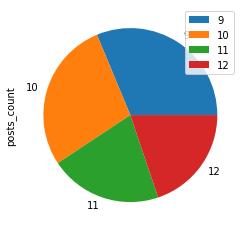

In [21]:
# постройте круговую диаграмму с количеством постов по месяцам
task9.groupby(['creation_month']).sum().plot(kind='pie', y='posts_count')

# Задание 10

Выгрузите данные активности пользователя, который опубликовал больше всего постов за всё время. Выведите данные за октябрь 2008 года в таком виде:

- номер недели;
- дата и время последнего поста, опубликованного на этой неделе.

| week_creation | creation_date |
| ------------- | ------------- |
| 40 | 2008-10-05 09:00:58 |
| 41 | 2008-10-12 21:22:23 |
| ... | ... |

In [22]:
# напишите запрос
query = '''
with top_user as 
(select user_id,
(count(id)) as qty
from stackoverflow.posts
group by 1
order by 2 desc
limit 1),

sessions as (
select extract (week from p.creation_date):: integer as week,
p.creation_date
from stackoverflow.posts p
inner join top_user tu on tu.user_id=p.user_id
where (date_trunc('month', creation_date) :: date) ='2008-10-01')

select distinct week,
last_value(creation_date) over (partition by week order by creation_date ROWS BETWEEN CURRENT ROW AND UNBOUNDED FOLLOWING)
from sessions
order by 1

'''

# выполните запрос

task10 = pd.read_sql_query(query, con=engine) 
task10

,week,last_value
0,40,2008-10-05 09:00:58
1,41,2008-10-12 21:22:23
2,42,2008-10-19 06:49:30
3,43,2008-10-26 21:44:36
4,44,2008-10-31 22:16:01
